<a href="https://colab.research.google.com/github/SaraEmilay/Classifica-o-com-SKLearn-de-dados-de-diabetes/blob/main/Compesaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd

file1 = '/content/drive/MyDrive/AmostraSara/_cadastro_geral_1.xlsx'
file2 = '/content/drive/MyDrive/AmostraSara/_cadastro_geral_2.xlsx'


In [38]:
combined_df = pd.merge(df1, df2, on='Matrícula Imóvel', how='outer', suffixes=('', '_drop'))

In [39]:
columns_to_drop = [col for col in combined_df.columns if '_drop' in col]
combined_df = combined_df.drop(columns=columns_to_drop)


In [40]:
df=combined_df
df.shape

(125519, 21)

In [41]:
df.columns

Index(['Totalizador', 'Gerência Regional', 'Localidade', 'Município', 'Bairro',
       'Município Princ Loca', 'Endereço', 'Subcategoria', 'Perfil Imóvel',
       'Setor', 'Quadra', 'Lote Imóvel', 'Sublote Imóvel',
       'Sist. Abastecimento', 'Subsist. Abastecimento', 'Sist. Esgoto',
       'Distrito Operacional', 'Matrícula Imóvel', 'Categoria Principal',
       'Tipo Consumidor', 'Qt. Economia'],
      dtype='object')

In [42]:

contingency_table = pd.crosstab(df['Bairro'], df['Tipo Consumidor'])
print(contingency_table)

# Testes estatísticos
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Tipo Consumidor     -  GRANDE  NORMAL
Bairro                               
AFLITOS            30      72     376
AFOGADOS         1555      10    5815
BOA VISTA         715     186    3733
BONGI             489       5    1995
CAXANGA             0       0       1
COELHOS           780       1    1253
CORDEIRO          833      63    5212
CURADO             75       0     195
DERBY              47      26     348
ENCRUZILHADA       24      24     144
ESPINHEIRO        237     132    1108
ESTANCIA            0       0       2
GRACAS             72     152     692
ILHA DO LEITE      50      18     370
ILHA DO RETIRO    399      10     399
IPUTINGA            1       0       1
JIQUIA            290       0     959
MADALENA          983     189    3553
MANGUEIRA         481       0    2047
MUSTARDINHA       442       1    2114
PAISSANDU          60      22     183
PRADO             498      22    2179
RECIFE            425      19     562
SAN MARTIN        774      12    5576
SANTO AMARO 

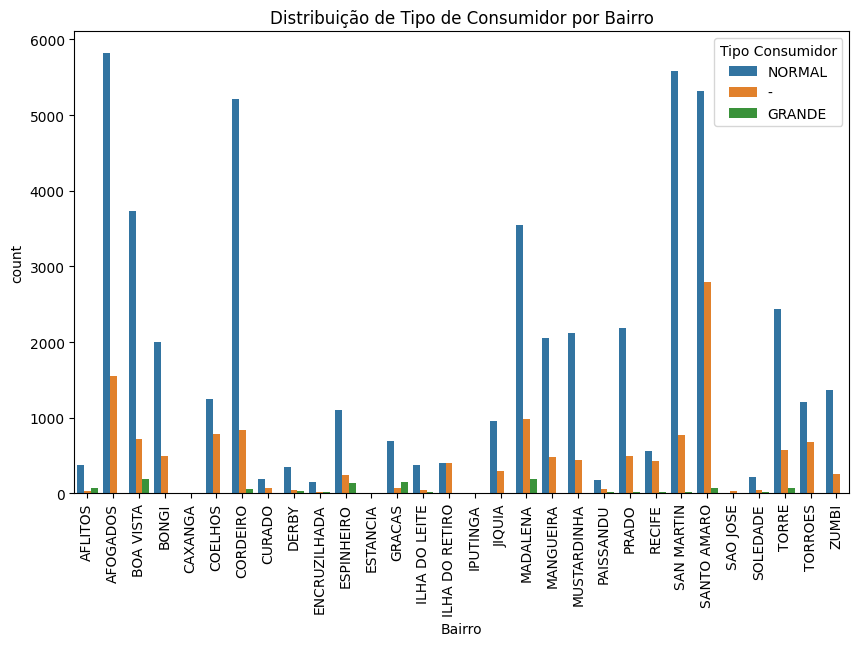

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

#  relação entre Bairro e Tipo de Consumidor
plt.figure(figsize=(10, 6))
sns.countplot(x='Bairro', hue='Tipo Consumidor', data=df)
plt.xticks(rotation=90)
plt.title('Distribuição de Tipo de Consumidor por Bairro')
plt.legend(title='Tipo Consumidor')
plt.show()


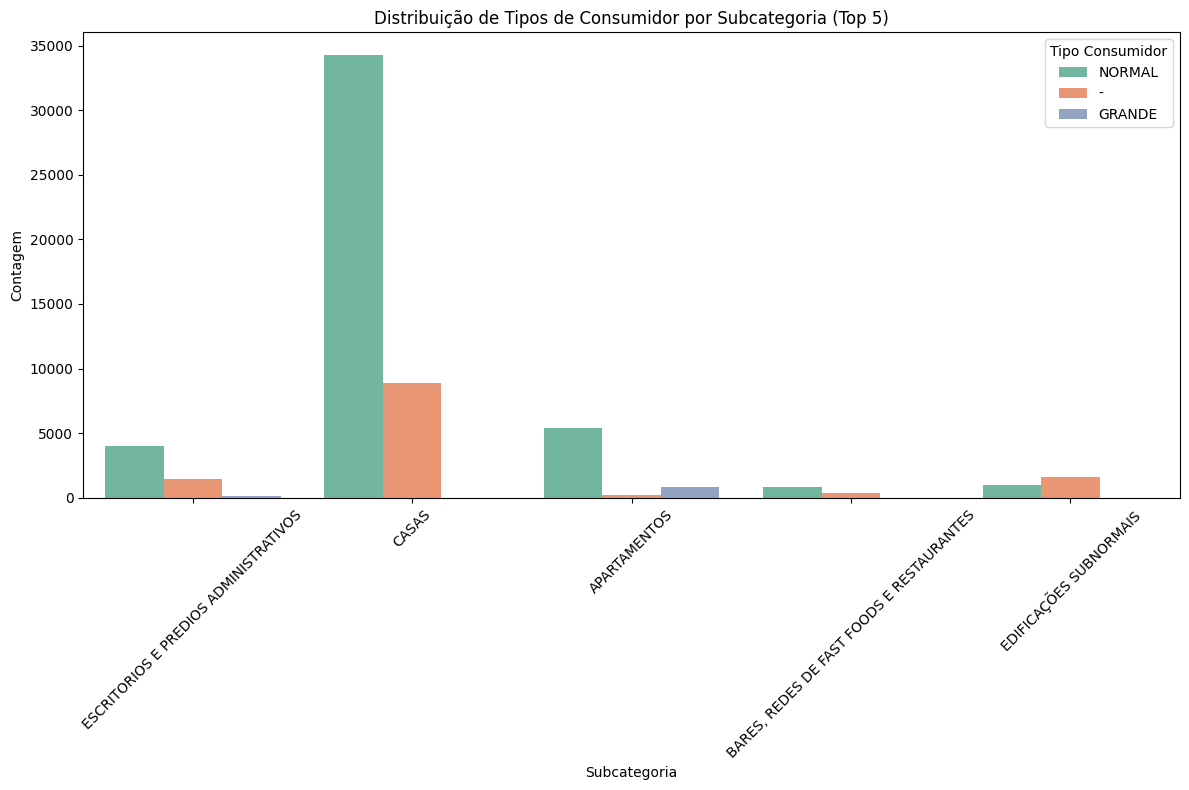

In [48]:
plt.figure(figsize=(12, 8))


top_subcategorias = df['Subcategoria'].value_counts().head(5).index


df_top_subcategorias = df[df['Subcategoria'].isin(top_subcategorias)]

sns.countplot(x='Subcategoria', hue='Tipo Consumidor', data=df_top_subcategorias, palette='Set2')


plt.xticks(rotation=45)

plt.title('Distribuição de Tipos de Consumidor por Subcategoria (Top 5)')
plt.xlabel('Subcategoria')
plt.ylabel('Contagem')
plt.legend(title='Tipo Consumidor')
plt.tight_layout()
plt.show()

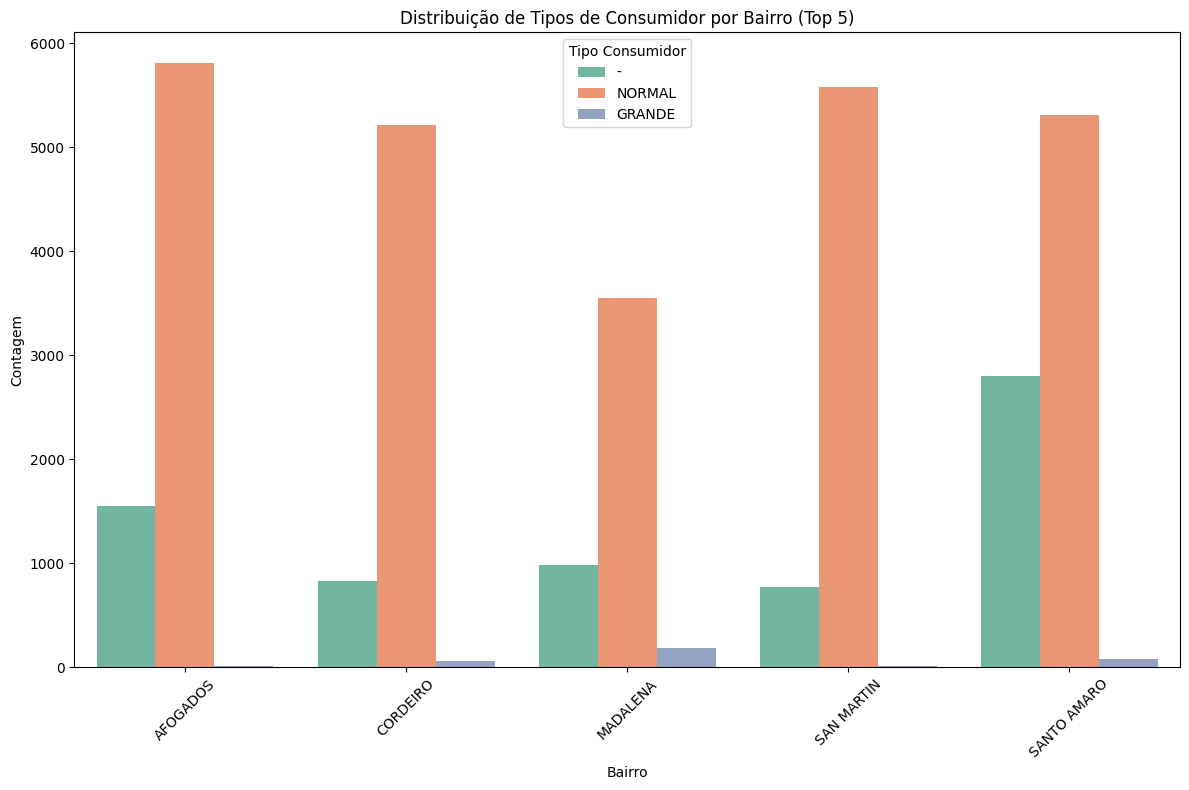

In [49]:
plt.figure(figsize=(12, 8))


top_Bairros = df['Bairro'].value_counts().head(5).index


df_top_Bairros = df[df['Bairro'].isin(top_Bairros)]

sns.countplot(x='Bairro', hue='Tipo Consumidor', data=df_top_Bairros, palette='Set2')


plt.xticks(rotation=45)

plt.title('Distribuição de Tipos de Consumidor por Bairro (Top 5)')
plt.xlabel('Bairro')
plt.ylabel('Contagem')
plt.legend(title='Tipo Consumidor')
plt.tight_layout()
plt.show()

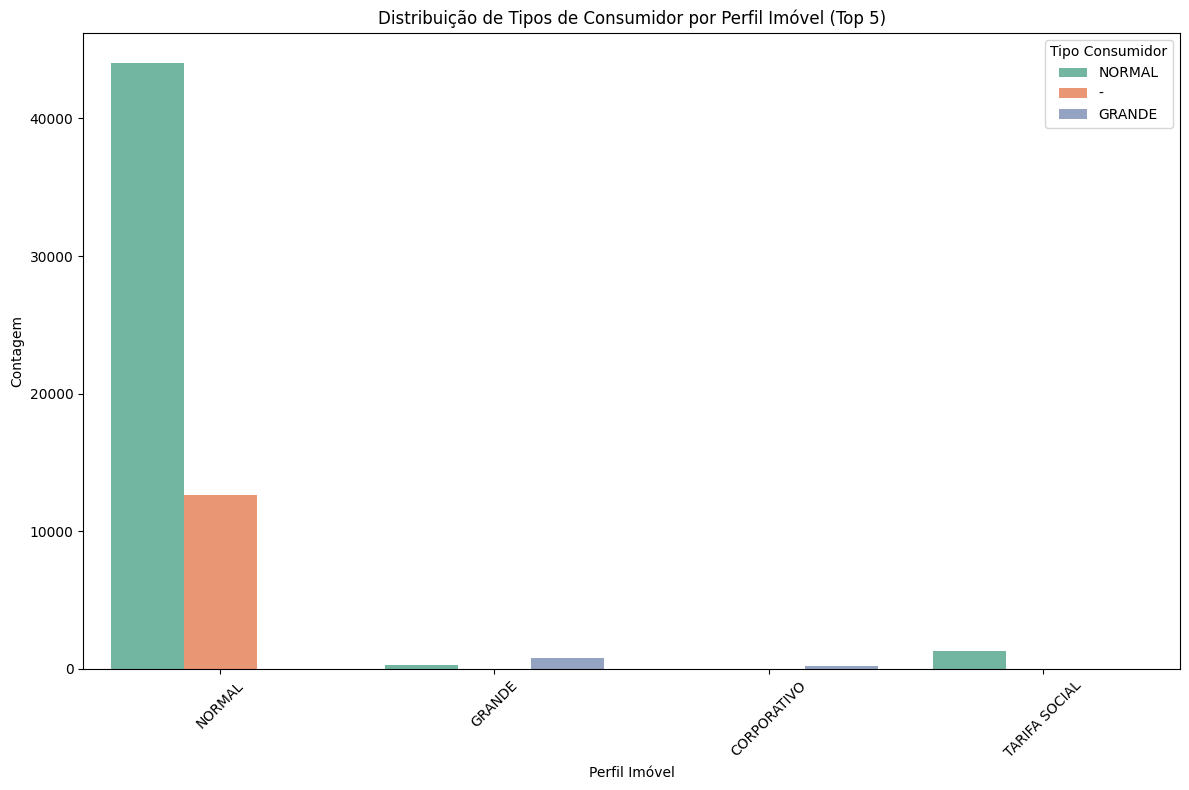

In [53]:
plt.figure(figsize=(12, 8))


top_Perfil_Imóvel = df['Perfil Imóvel'].value_counts().head(5).index


df_top_Perfil_Imóvel = df[df['Perfil Imóvel'].isin(top_Perfil_Imóvel)]

sns.countplot(x='Perfil Imóvel', hue='Tipo Consumidor', data=df_top_subcategorias, palette='Set2')


plt.xticks(rotation=45)

plt.title('Distribuição de Tipos de Consumidor por Perfil Imóvel (Top 5)')
plt.xlabel('Perfil Imóvel')
plt.ylabel('Contagem')
plt.legend(title='Tipo Consumidor')
plt.tight_layout()
plt.show()